In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('retail_sample_data.csv')

# Check the first few rows of the dataframe
print(df.head())


  Transaction_ID Transaction_Date Product_ID       Product_Name     Category  \
0         T00001       2025-03-28      P3628      Image Outdoor       Sports   
1         T00002       2025-02-23      P7794  Voice Smartphones  Electronics   
2         T00003       2024-10-15      P1230     Amount Laptops  Electronics   
3         T00004       2024-08-13      P6757         Much Decor         Home   
4         T00005       2024-11-09      P6792    Interview Women     Clothing   

  Sub_Category Product_Type Region  Quantity_Sold  Unit_Price  Discount  \
0      Outdoor      Premium  South             10       79.35      5.57   
1  Smartphones      Premium   East              1      180.09     31.34   
2      Laptops       Budget   East              5      425.27     42.45   
3        Decor      Premium   West              8      329.47     31.35   
4        Women       Budget  North              7      211.83     14.46   

   Cost_per_Unit  Total_Sales  Profit  Inventory_Stock  Inventory_Da

In [2]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Remove or fill null values
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with 0 or other default values (e.g., for missing 'Profit')
df_cleaned = df.fillna({'Profit': 0, 'Total_Sales': 0})

# Check again to ensure no missing values
print(df_cleaned.isnull().sum())



Transaction_ID      0
Transaction_Date    0
Product_ID          0
Product_Name        0
Category            0
Sub_Category        0
Product_Type        0
Region              0
Quantity_Sold       0
Unit_Price          0
Discount            0
Cost_per_Unit       0
Total_Sales         0
Profit              0
Inventory_Stock     0
Inventory_Days      0
Seasonality_Tag     0
Store_ID            0
dtype: int64
Transaction_ID      0
Transaction_Date    0
Product_ID          0
Product_Name        0
Category            0
Sub_Category        0
Product_Type        0
Region              0
Quantity_Sold       0
Unit_Price          0
Discount            0
Cost_per_Unit       0
Total_Sales         0
Profit              0
Inventory_Stock     0
Inventory_Days      0
Seasonality_Tag     0
Store_ID            0
dtype: int64


In [3]:
# Group by Category and Sub-Category to calculate Profit Margin
category_profit_margin = df_cleaned.groupby(['Category', 'Sub_Category']).agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Cost=('Cost_per_Unit', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Calculate profit margin
category_profit_margin['Profit_Margin'] = (category_profit_margin['Total_Profit'] / category_profit_margin['Total_Sales']) * 100

print(category_profit_margin)


       Category Sub_Category  Total_Sales  Total_Cost  Total_Profit  \
0      Clothing         Kids    969343.24   135977.25     271067.65   
1      Clothing          Men   1076698.24   139994.24     306041.16   
2      Clothing        Women   1026789.58   139154.87     282256.18   
3   Electronics  Accessories   1050812.49   139795.90     296915.55   
4   Electronics      Laptops   1071700.49   142922.84     301169.04   
5   Electronics  Smartphones   1090538.54   139208.28     313445.11   
6          Home   Appliances   1094530.75   141921.75     302911.23   
7          Home        Decor   1103456.40   134760.80     310423.78   
8          Home    Furniture   1012216.68   130890.36     284141.33   
9        Sports      Fitness   1040545.05   141070.02     292726.74   
10       Sports      Outdoor   1020148.18   135093.86     284335.25   
11       Sports  Team Sports   1016740.47   136233.03     285396.62   

    Profit_Margin  
0       27.964052  
1       28.424042  
2       27.48919

                Inventory_Days    Profit
Inventory_Days        1.000000 -0.007185
Profit               -0.007185  1.000000


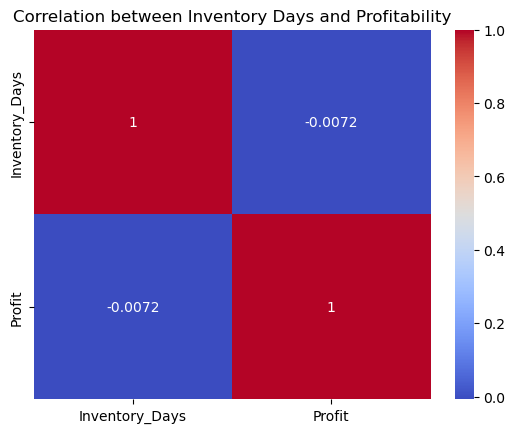

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation between Inventory Days and Profit
correlation = df_cleaned[['Inventory_Days', 'Profit']].corr()
print(correlation)

# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Inventory Days and Profitability')
plt.show()



In [7]:
# Try with more lenient filters
slow_moving = df[(df['Inventory_Days'] > 30) & (df['Profit'] < 10)]
overstocked = df[(df['Inventory_Stock'] > 20) & (df['Profit'] < 10)]

print("Slow-Moving Products:\n", slow_moving[['Product_Name', 'Inventory_Days', 'Profit']])
print("\nOverstocked Products:\n", overstocked[['Product_Name', 'Inventory_Stock', 'Profit']])


Slow-Moving Products:
            Product_Name  Inventory_Days  Profit
38           Minute Men              54    7.09
50    Movie Accessories             120    9.95
218            Five Men              46    8.65
242        So Furniture             116    9.20
294          Indeed Men              72    4.86
...                 ...             ...     ...
9714     Art Appliances             130    4.15
9732      Piece Outdoor             167    3.12
9783          Red Women              79    5.50
9850  White Accessories             131    3.66
9948   Civil Appliances              49    7.36

[140 rows x 3 columns]

Overstocked Products:
            Product_Name  Inventory_Stock  Profit
38           Minute Men               92    7.09
50    Movie Accessories               27    9.95
77          Result Kids               82    5.00
218            Five Men               81    8.65
242        So Furniture               51    9.20
...                 ...              ...     ...
9714     A

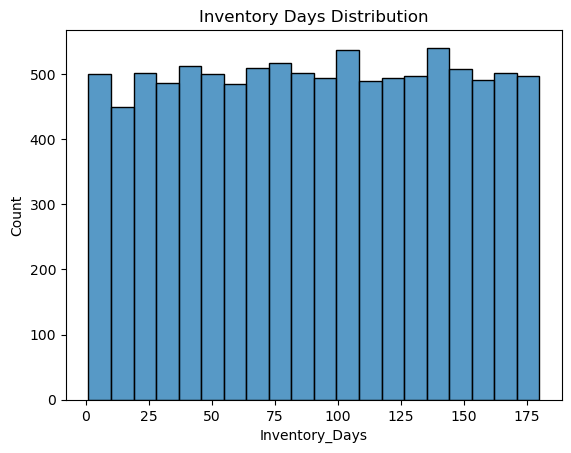

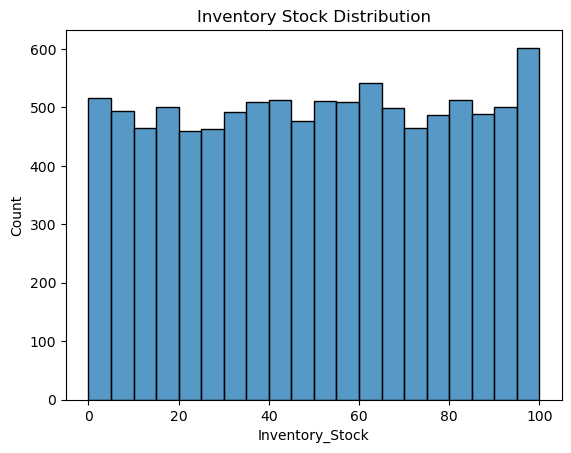

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Inventory Days distribution
sns.histplot(df['Inventory_Days'], bins=20)
plt.title("Inventory Days Distribution")
plt.show()

# Inventory Stock distribution
sns.histplot(df['Inventory_Stock'], bins=20)
plt.title("Inventory Stock Distribution")
plt.show()
